# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Louis Januardy Citra
- **Email:** louisjcitra@gmail.com
- **ID Dicoding:** louisjc

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling laris dan paling sedikit terjual?
- Bagaimana tren penjualan dari bulan ke bulan?
- Dari kota/negara bagian mana mayoritas pelanggan berasal?
- Apakah ada pola produk yang sering dibeli secara bersamaan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [3]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [8]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


**Insight:**
- Fitur **product_category_name** masih menggunakan bahasa Portugis. Oleh karena itu, fitur **product_category_name_translation** sangat krusial untuk digunakan/di-merge agar kategori dapat dibaca dalam Bahasa Inggris.
- Dataset ini terdiri dari banyak tabel terpisah (Customers, Order, Products, Payments, dll). Ini menunjukkan bahwa untuk melakukan analisis yang utuh (misalnya menghubungkan profil pembeli dengan barang yang dibeli), diperlukan proses penggabungan data (merging/joining) menggunakan key seperti order_id atau customer_id.
- Pada dataset **geolocation**, terdapat *special characters* pada kolom **geolocation_city**. Hal tersebut harus diatasi pada tahap cleaning data proses analisis berjalan dengan akurat.

### Assessing Data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [23]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Fitur / kolom yang berisi tanggal dan waktu (shipping_limit_date, review_creation_date, review_answer_timestamp, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) masih bertipe **object**. Fitur / kolom tersebut perlu diubah tipe datanya menjadi **datetime** pada tahap cleaning data agar dapat dilakukan analisis berbasis waktu.
- Terdapat data **duplikat** pada dataset **geolocation**. Hal tersebut harus ditangani pada tahap cleaning data menggunakan metode **drop_duplicates**.
- Terdapat beberapa kolom yang memiliki *missing values* pada dataset **order_reviews, orders, products**. Sehingga harus diperiksa lebih lanjut untuk menentukan apakah data tersebut akan ditangani melalui metode *dropping* atau *imputation*.





### Cleaning Data

In [38]:
# Menghilangkan special characters pada kolom geolocation_city
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Cek hasil perubahannya
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [39]:
# Mengubah tipe data pada kolom yang menyertakan tanggal dan waktu dari object menjadi datetime
datetime_cols_orders = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in datetime_cols_orders:
    orders_df[col] = pd.to_datetime(orders_df[col])

order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

datetime_cols_reviews = ["review_creation_date", "review_answer_timestamp"]

for col in datetime_cols_reviews:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

print(orders_df.info(), "\n")
print(order_items_df.info(), "\n")
print(order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dty

In [40]:
# Menghapus data duplikat
geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first', inplace=True)
print("Jumlah duplikat setelah cleaning:", geolocation_df.duplicated(subset='geolocation_zip_code_prefix').sum())

Jumlah duplikat setelah cleaning: 0


In [41]:
# Mengatasi Missing Values
order_reviews_df.fillna(value={
    "review_comment_title": "No Title",
    "review_comment_message": "No Message"
}, inplace=True)

products_df["product_category_name"] = products_df["product_category_name"].fillna("unknown")

products_df.dropna(subset=[
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
], inplace=True)

cols_to_fill_zero = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty"
]
products_df[cols_to_fill_zero] = products_df[cols_to_fill_zero].fillna(0)


cols_to_check = [
    "order_delivered_customer_date",
    "order_approved_at",
    "order_delivered_carrier_date"
]

orders_df.dropna(subset=cols_to_check, inplace=True)

print("Missing values di dataset Reviews:\n", order_reviews_df.isna().sum(), "\n")
print("Missing values di dataset Products:\n", products_df.isna().sum(), "\n")
print("Missing values di dataset Orders:\n", orders_df.isna().sum())

Missing values di dataset Reviews:
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64 

Missing values di dataset Products:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64 

Missing values di dataset Orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**
- Duplikasi data pada dataset **geolocation** telah ditangani dan *special characters* pada kolom **geolocation_city** telah dinormalisasi.
- Seluruh kolom yang memuat informasi tanggal dan waktu (pada dataset **orders, reviews, dan items**) kini telah memiliki tipe data yang benar (datetime). Ini memungkinkan dilakukannya analisis berdasarkan tanggal dan waktu.
- Missing values pada dataset **reviews, products, dan orders** telah ditangani. Kini dataset bersih dari missing values.

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
# Melihat persebaran jumlah customer berdasarkan kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [43]:
# Melihat persebaran jumlah customer berdasarkan state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [44]:
# Melihat jumlah order berdasarkan status pengiriman
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered    96455
canceled         6
Name: order_id, dtype: int64

In [45]:
# Cek jumlah kategori unik & kategori terbanyak (berdasarkan variasi produk)
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

In [46]:
all_products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

order_items_product_df = pd.merge(
    left=order_items_df,
    right=all_products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [47]:
all_data = pd.merge(
    left=orders_df,
    right=order_items_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_data = pd.merge(
    left=all_data,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_data = pd.merge(
    left=all_data,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id")

all_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Message,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No Message,2018-02-17,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [48]:
# Melihat rata-rata harga dan rating berdasarkan kategori produk
all_data.groupby(by="product_category_name_english").agg({
    "product_id": "count",
    "price": "mean",
    "review_score": "mean"
}).sort_values(by="product_id", ascending=False)

,product_id,price,review_score
product_category_name_english,,,
bed_bath_table,11106,93.376886,3.921067
health_beauty,9521,129.977927,4.190738
sports_leisure,8487,113.109769,4.165876
furniture_decor,8235,87.177921,3.949969
computers_accessories,7707,116.275112,3.985139
...,...,...,...
arts_and_craftmanship,24,75.583750,4.125000
la_cuisine,14,146.785000,4.000000
cds_dvds_musicals,14,52.142857,4.642857


In [49]:
# Melihat kota mana yang punya daya beli (rata-rata harga) tertinggi atau ongkir termahal
all_data.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "price": "mean",
    "freight_value": "mean"
}).sort_values(by="order_id", ascending=False)

,order_id,price,freight_value
customer_city,,,
sao paulo,15044,106.739206,14.273568
rio de janeiro,6603,125.703343,20.564260
belo horizonte,2697,111.725850,19.380835
brasilia,2071,125.817089,21.068044
curitiba,1489,119.110675,18.783235
...,...,...,...
viseu,1,301.000000,39.020000
agrestina,1,1989.000000,77.340000
agisse,1,43.000000,13.370000


In [50]:
# Melihat rata-rata harga dan ongkir berdasarkan rating
all_data.groupby(by="review_score").agg({
    "order_id": "nunique",
    "price": "mean",
    "freight_value": "mean"
}).sort_values(by="review_score", ascending=False)

,order_id,price,freight_value
review_score,,,
5.0,56802,121.162497,19.566546
4.0,18939,118.412223,20.033346
3.0,7942,109.798970,20.285329
2.0,2937,114.212179,20.930925
1.0,9384,123.346362,21.058716


In [51]:
# Melihat total harga produk berdasarkan status order
all_data.groupby(by="order_status").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
order_status,,
delivered,96455,13276737.98
canceled,6,646.18


In [52]:
# Melihat jumlah order dan pendapatan di setiap bulannya
monthly_orders_df = all_data.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "total_revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count,total_revenue
0,2016-09,1,134.97
1,2016-10,270,41067.99
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,112487.50
5,2017-02,1641,233898.86
6,2017-03,2546,360865.25
7,2017-04,2303,341209.62
8,2017-05,3545,492441.44
9,2017-06,3135,425387.66


In [53]:
transaction_df = all_data[['order_id', 'product_category_name_english']].dropna()

product_pairs = pd.merge(
    transaction_df,
    transaction_df,
    on='order_id',
    suffixes=('_A', '_B')
)

product_pairs = product_pairs[product_pairs['product_category_name_english_A'] < product_pairs['product_category_name_english_B']]
product_pairs_df = product_pairs.groupby(['product_category_name_english_A', 'product_category_name_english_B']).size().reset_index(name='frequency')
product_pairs_df = product_pairs_df.sort_values(by='frequency', ascending=False).head()
product_pairs_df['product_pair'] = product_pairs_df['product_category_name_english_A'] + " & " + product_pairs_df['product_category_name_english_B']

product_pairs_df

,product_category_name_english_A,product_category_name_english_B,frequency,product_pair
55,bed_bath_table,furniture_decor,137,bed_bath_table & furniture_decor
60,bed_bath_table,home_confort,64,bed_bath_table & home_confort
164,furniture_decor,garden_tools,59,furniture_decor & garden_tools
168,furniture_decor,housewares,37,furniture_decor & housewares
61,bed_bath_table,housewares,37,bed_bath_table & housewares


**Insight:**
- Mayoritas pelanggan terkonsentrasi di kota-kota besar seperti **Sao Paulo** dan **Rio de Janeiro**.
- Kota-kota dengan jumlah order sedikit cenderung memiliki rata-rata **freight_value** (ongkir) yang jauh lebih tinggi, yang mungkin menjadi hambatan utama bagi pelanggan di area tersebut untuk berbelanja.
- Kategori seperti **bed_bath_table, health_beauty, dan sports_leisure** mendominasi jumlah transaksi.
- Kategori rumah tangga seperti **bed_bath_table** dan **furniture_decor** memiliki keterkaitan paling kuat antar produknya, mengindikasikan bahwa pelanggan cenderung melengkapi kebutuhan fungsional dengan kebutuhan estetika dalam satu pesanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laris dan paling sedikit terjual?

In [54]:
sum_order_items_df = all_data.groupby("product_category_name_english").product_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_id": "quantity"
}, inplace=True)
sum_order_items_df

,product_category_name_english,quantity
0,bed_bath_table,11106
1,health_beauty,9521
2,sports_leisure,8487
3,furniture_decor,8235
4,computers_accessories,7707
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,7


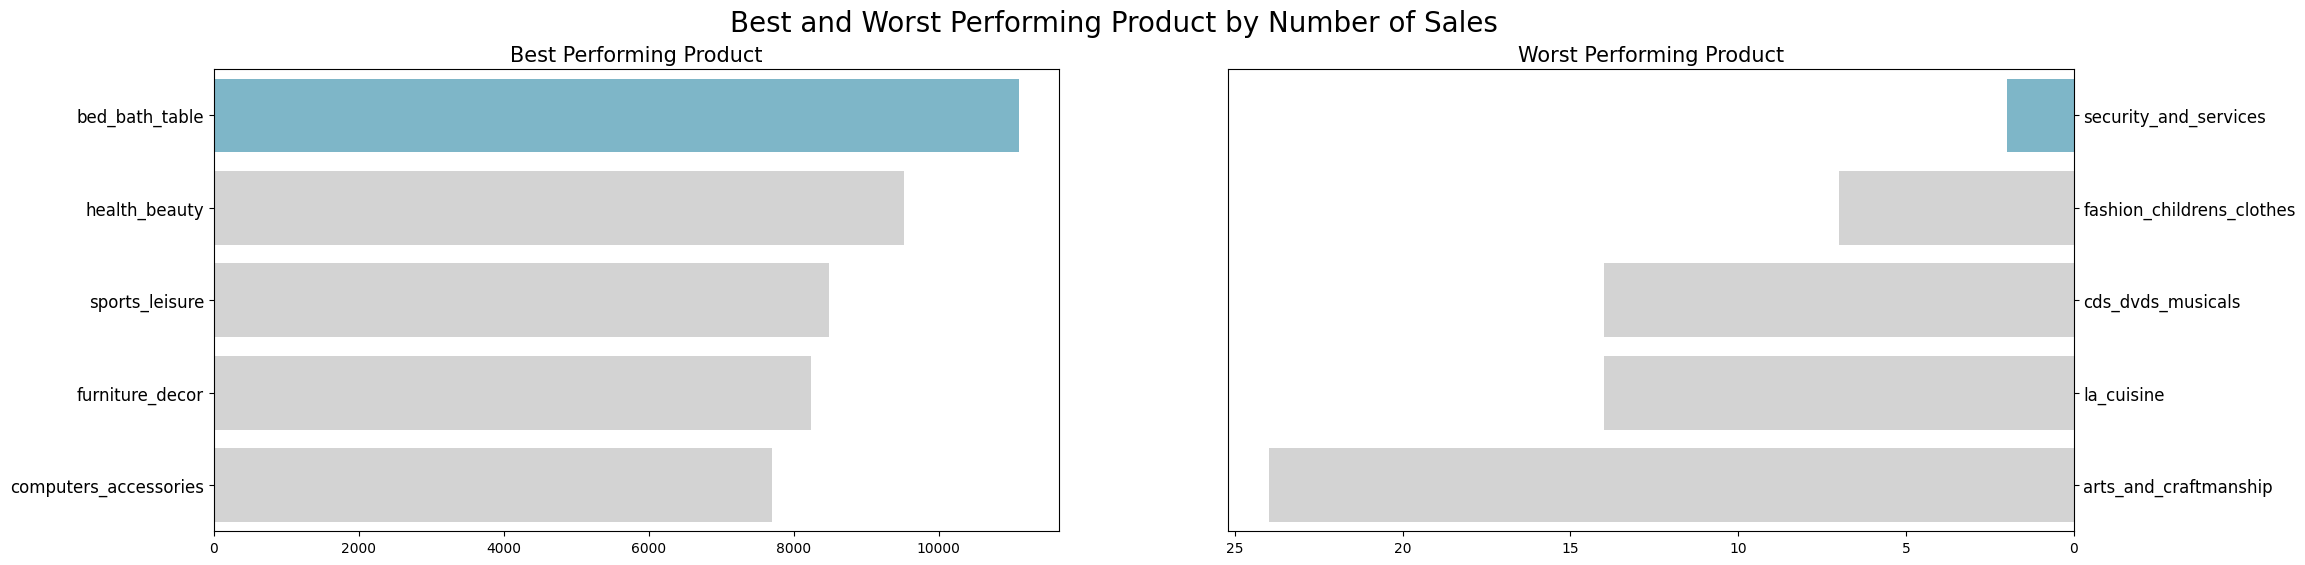

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Chart 1: Best Performing Product
sns.barplot(x="quantity", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, hue="product_category_name_english", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Chart 2: Worst Performing Product
sns.barplot(x="quantity", y="product_category_name_english", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, hue="product_category_name_english", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana tren penjualan dari bulan ke bulan?

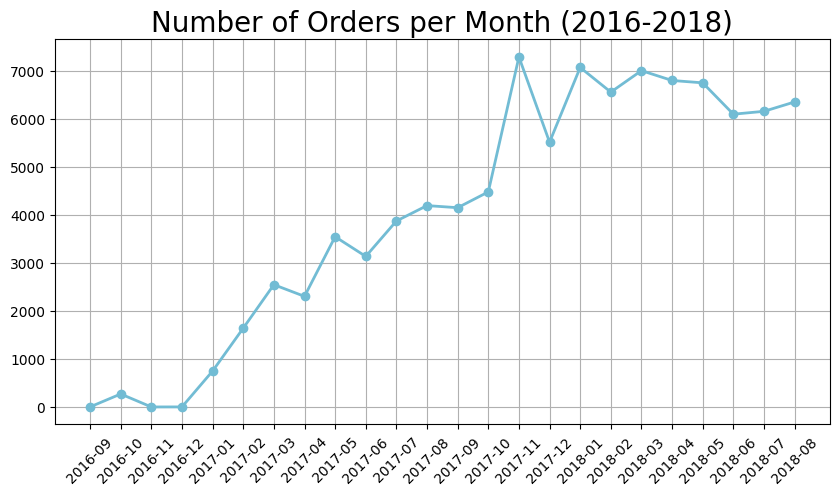

In [56]:
plt.figure(figsize=(10, 5))

plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Pertanyaan 3: Dari kota/negara bagian mana mayoritas pelanggan berasal?

- Berdasarkan Negara Bagian

In [57]:
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

bystate_df

,customer_state,customer_count
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1278
6,DF,2080
7,ES,1995
8,GO,1957
9,MA,716


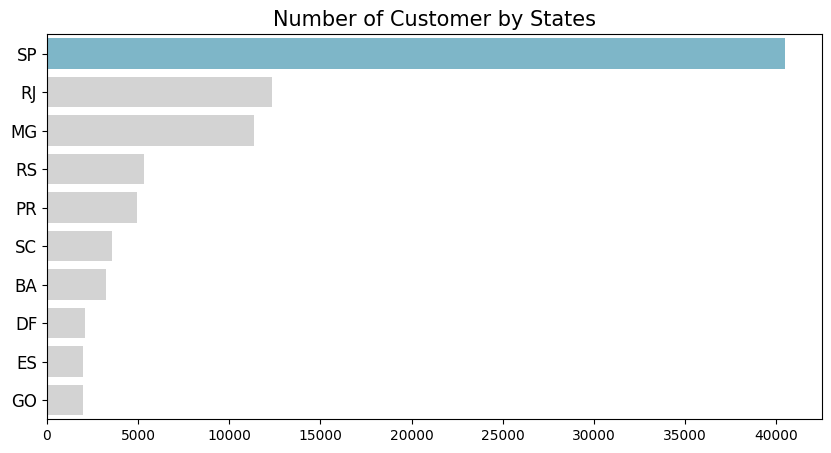

In [58]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_,
    hue="customer_state",
    legend=False
)

plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

- Berdasarkan Kota

In [59]:
bycity_df = all_data.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

bycity_df

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,11
3,abaetetuba,11
4,abaiara,2
...,...,...
4080,xinguara,9
4081,xique-xique,3
4082,zacarias,2
4083,ze doca,5


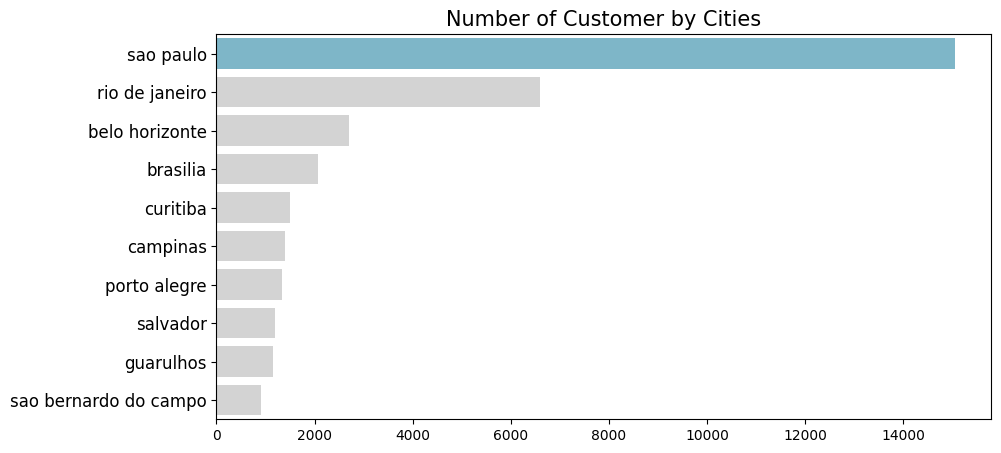

In [60]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_,
    hue="customer_city",
    legend=False
)

plt.title("Number of Customer by Cities", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: Apakah ada pola produk yang sering dibeli secara bersamaan oleh pelanggan?

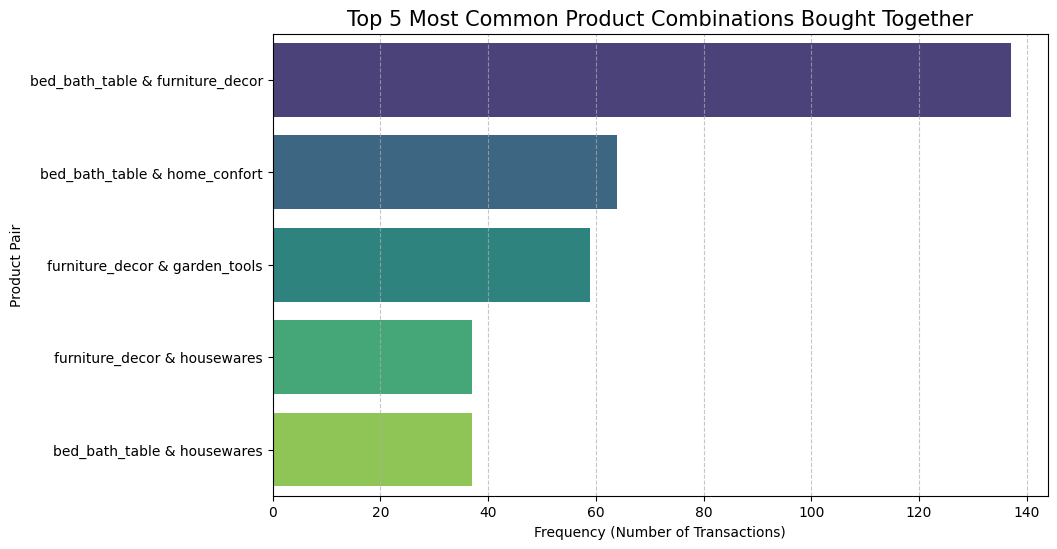

In [61]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="frequency",
    y="product_pair",
    data=product_pairs_df,
    palette="viridis",
    hue="product_pair",
    legend=False
)

plt.title("Top 5 Most Common Product Combinations Bought Together", fontsize=15)
plt.xlabel("Frequency (Number of Transactions)")
plt.ylabel("Product Pair")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Produk kategori **bed_bath_table** memiliki volume transaksi yang lebih unggul dari produk kategori lainnya. Kategori **health_beauty** dan **sports_leisure** juga memiliki jumlah penjualan yang tinggi. Sebaliknya, kategori seperti **la_cuisine**, **fashion_childrens_clothes**, dan **security_and_services** mencatat angka penjualan yang sangat minim. Pola ini mengindikasikan bahwa persepsi pelanggan terhadap platform ini lebih kuat sebagai destinasi belanja kebutuhan rumah tangga dan hobi, dibandingkan untuk kebutuhan fashion anak atau layanan keamanan.
- Secara garis besar, tren penjualan dari awal 2017 hingga pertengahan 2018 menunjukkan grafik yang menanjak. Rata-rata pesanan di tahun 2018 stabil di angka tinggi (sekitar 1.500+ order/bulan), jauh lebih tinggi dibandingkan awal 2017 (sekitar 500-1000 order/bulan).
- Mayoritas mutlak pelanggan berasal dari negara bagian SP (Sao Paulo).
- Kombinasi **bed_bath_table** dan **furniture_decor** adalah pasangan yang paling sering dibeli bersamaan (frekuensi tertinggi). Ini menunjukkan perilaku konsumen yang tidak hanya membeli barang fungsional, tapi juga ingin mendekorasi ruangan dalam satu waktu.

## Analisis Lanjutan (Opsional): RFM Analysis

**Tujuan Analisis:**
Mengidentifikasi segmen pelanggan terbaik (*Best Customers*) berdasarkan pola transaksi mereka. Dengan memahami segmen ini, perusahaan dapat merancang strategi pemasaran atau retensi yang lebih efektif.

Parameter yang digunakan dalam analisis ini adalah:
1.  **Recency (R):** Menghitung berapa hari yang lalu transaksi terakhir dilakukan oleh pelanggan. Semakin kecil angka recency (semakin baru), semakin baik.
2.  **Frequency (F):** Menghitung seberapa sering seorang pelanggan melakukan pembelian dalam periode sejarah data. Semakin tinggi frekuensinya, semakin loyal pelanggan tersebut.
3.  **Monetary (M):** Menghitung total uang yang dikeluarkan oleh pelanggan untuk berbelanja. Semakin besar nilai monetary, semakin besar kontribusi pendapatan pelanggan tersebut bagi perusahaan.

In [62]:
recent_date = all_data['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

rfm_df = all_data.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": lambda x: (recent_date - x.max()).days,
    "order_id": "nunique",
    "price": "sum"
})

rfm_df.columns = ["customer_unique_id", "recency", "frequency", "monetary"]

rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


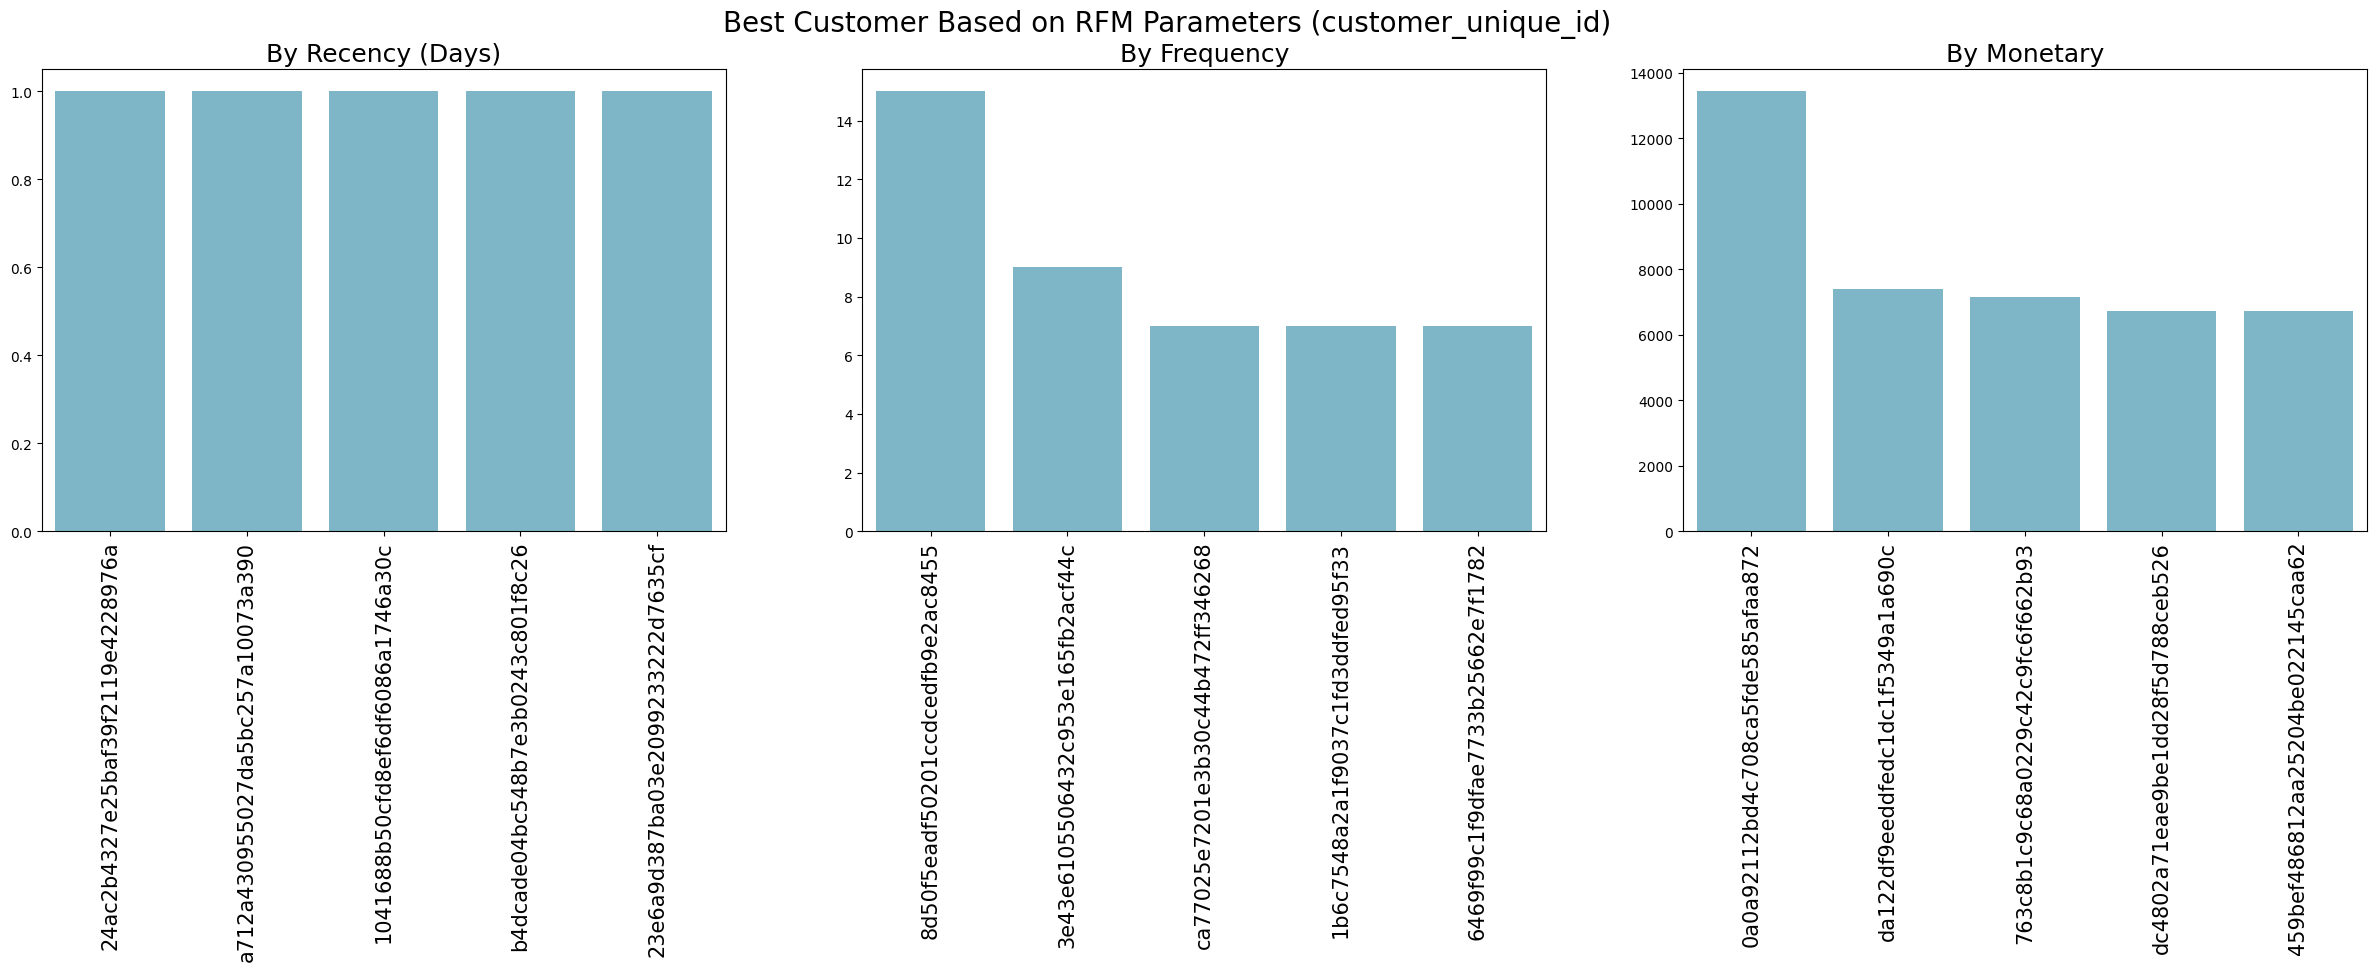

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency",
    x="customer_unique_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    hue="customer_unique_id",
    palette=colors,
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(
    y="frequency",
    x="customer_unique_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    hue="customer_unique_id",
    palette=colors,
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(
    y="monetary",
    x="customer_unique_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    hue="customer_unique_id",
    palette=colors,
    legend=False,
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

In [64]:
all_data.to_csv("main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: Kategori produk **bed_bath_table** (Perlengkapan rumah tangga) merupakan produk yang paling laris, diikuti oleh kategori **health_beauty**. Sebaliknya, kategori **security_and_services** dan **fashion_childrens_clothes** memiliki kinerja penjualan terendah. Hal ini menunjukkan bahwa pelanggan lebih mempercayai platform ini untuk kebutuhan rumah tangga dibandingkan produk fashion anak atau jasa keamanan.

- Conclution pertanyaan 2: Tren penjualan perusahaan menunjukkan pertumbuhan positif dari tahun 2017 hingga 2018. Lonjakan penjualan tertinggi terjadi secara signifikan pada bulan November 2017, yang kemungkinan besar karena strategi promosi. Ini mengindikasikan bahwa strategi promosi sangat efektif dalam mendongkrak jumlah pesanan.

- Conclution pertanyaan 3: Pelanggan sangat terpusat di negara bagian Sao Paulo (SP), yang jumlahnya jauh melampaui negara bagian lainnya seperti Rio de Janeiro (RJ) dan Minas Gerais (MG). Konsentrasi pasar yang tinggi di wilayah tersebut menandakan perlunya strategi logistik yang efisien di area tersebut.

- Conclution pertanyaan 4: Terdapat pola pembelian yang kuat pada kategori **bed_bath_table** dan **furniture_decor**. Temuan ini menunjukkan bahwa pelanggan yang membeli kebutuhan fungsional memiliki kecenderungan tinggi untuk sekaligus membeli barang dekorasi, sehingga strategi bundling produk untuk kedua kategori ini sangat direkomendasikan.